# ABSTRACT


Plataformas como Uber y Lyft llegaron al mercado como una alternativa para digitalizar el servicio de transporte en automóviles, estas tecnologías han recibido una gran aceptación debido a la facilidad de acceso al servicio, el factor de seguridad, los métodos de pago, las tarifas fijas al momento de solicitar un viaje y la disponibilidad de socios trabajando con la aplicación. Sin embargo, es muy importante considerar que el costo del servicio está mayormente influenciado por la demanda de usuarios y la disponibilidad de los socios que se ve afectada por la hora, el clima y el contexto de la ciudad. Por lo tanto, se vuelve relevante implementar un modelo de machine learning donde se pueda predecir el costo de estos servicios a una determinada hora teniendo en cuenta la distancia del trayecto, las condiciones climáticas y el tipo de servicio. Por lo tanto, es importante responder las siguientes preguntas.




1.   ¿Realmente hay un incremento del precio del servicio cuando hay condiciones meteorológicas de lluvia?
2.   ¿Qué tipo de servicio o plataforma es mas barato utilizar en una hora pico?
3.   ¿Cuál es la diferencia o incremento de precio entre las horas valle y las horas pico por cada tipo de servicio?
4.   ¿Qué tipo de servicio o plataforma es mas barato utilizar en una hora pico?
5.   ¿Existen días donde sea más costoso desplazarse, por ejemplo, vale lo mismo transportarse un lunes a las 9am que el sábado a la misma hora?
6.  ¿Hay algún otro factor externo como un evento que afecte la demanda de servicios?








# EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Uber_Lyft_Weather = pd.read_csv('/content/drive/MyDrive/CODER EDA/weather.csv')
Uber_Lyft_Cab_rides = pd.read_csv('/content/drive/MyDrive/CODER EDA/cab_rides.csv')

In [4]:
Uber_Lyft_Weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [5]:
Uber_Lyft_Cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [6]:
Uber_Lyft_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [7]:
Uber_Lyft_Cab_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [8]:
Uber_Lyft_Weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [9]:
Uber_Lyft_Cab_rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


En este gráfico de dispersión si bien no presenta una tendencia definida, se puede observar que la mayoría de los viajes tiene una distancia de 0,3 a 5mi aproximadamente y sus precios varían entre 5 y 45 dólares teniendo presente el tipo de producto que ofrecen (no es lo mismo uber con respecto a uberX, por ejemplo)


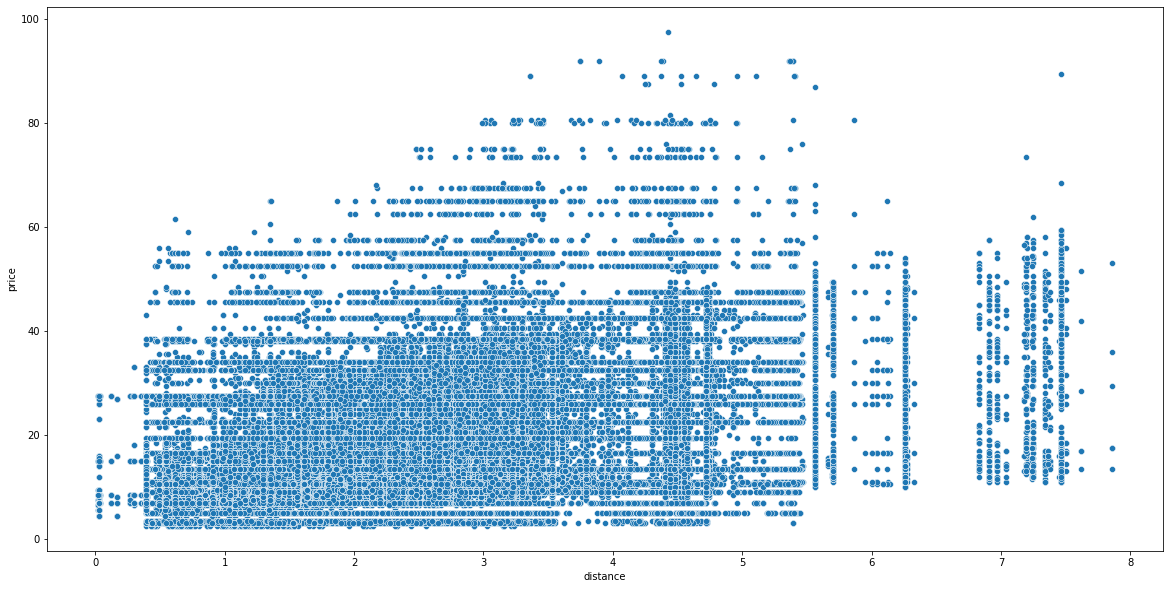

In [10]:
plt.figure(figsize=(20, 10))
graph = sns.scatterplot(data=Uber_Lyft_Cab_rides, x="distance", y="price")

En este gráfico se puede observar la cantidad de servicios solicitados según su distancia (proporción), diferenciando el proveedor del servicio (Uber o Lyft).

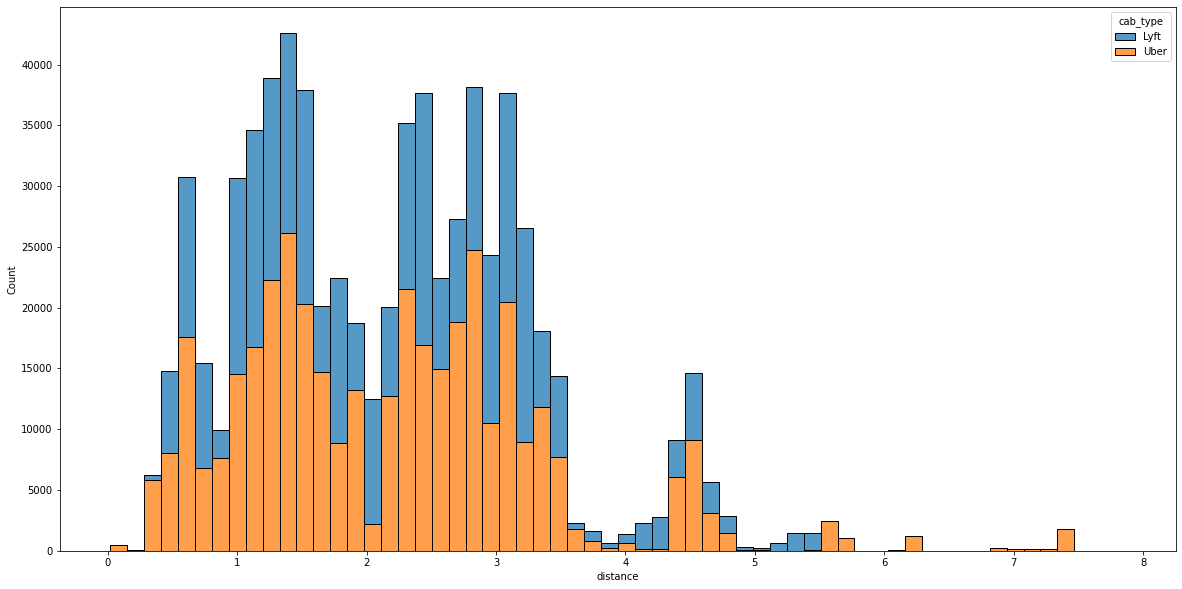

In [11]:
plt.figure(figsize=(20, 10))
sns.histplot(data=Uber_Lyft_Cab_rides, x="distance", bins=60, hue='cab_type', multiple='stack')

En este gráfico se puede observar el precio según el servicio ofrecido por los proveedores (Uber o Lyft), en él se puede observar que hay una alta cantidad de valores atipicos lo que indica que se debe revisar cómo va a ser el manejo/tratamiento de estos.

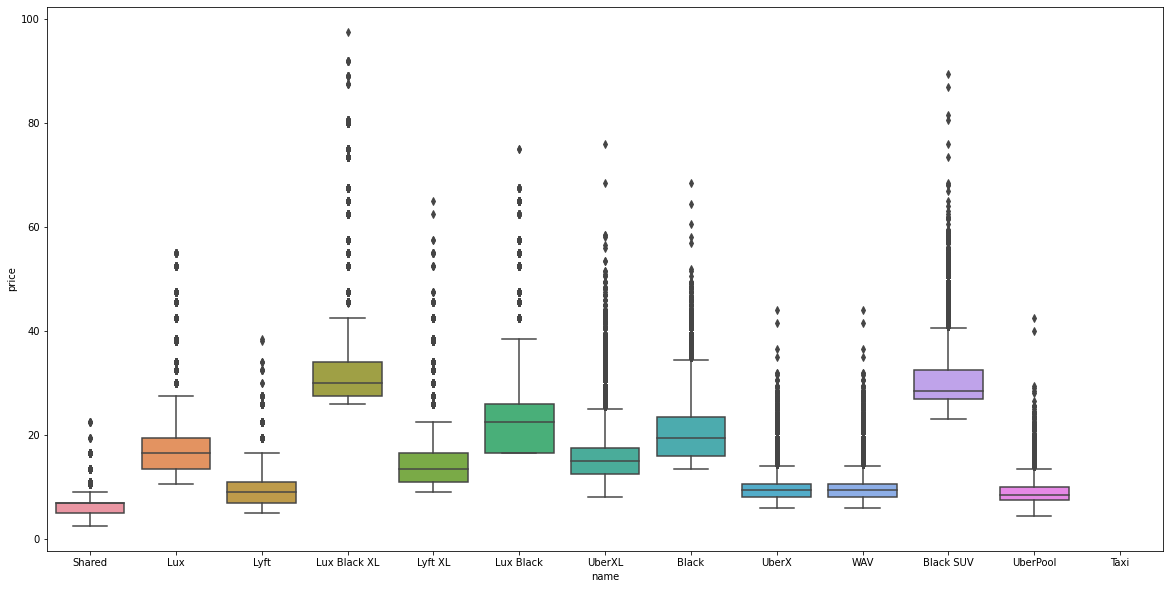

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=Uber_Lyft_Cab_rides, x='name',y='price')

In [13]:
df = pd.Series(Uber_Lyft_Cab_rides['name'])
freq = df.groupby(Uber_Lyft_Cab_rides['name']).count() 

En este gráfico se puede observar la proporción de los productos estudiados en la muestra, demostrando que es una muestra "equitativamente" distribuida, pues no existe una variación significativa entre cantidad de servicios estudiados según el producto.


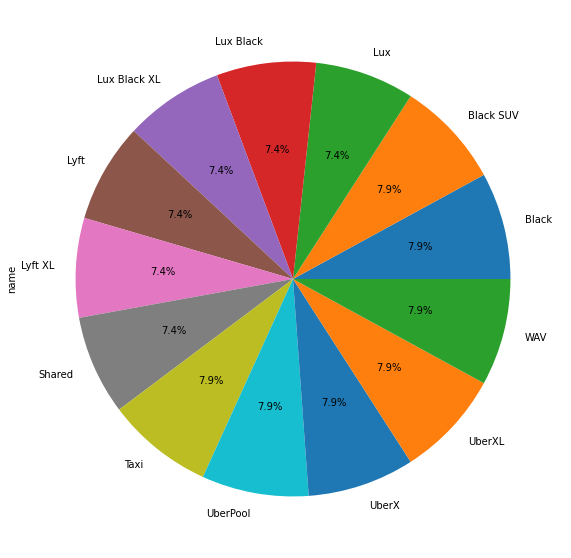

In [14]:
fig,ax = plt.subplots(figsize =(10, 10))
freq.plot.pie(autopct='%1.1f%%')

In [15]:
from datetime import datetime
Uber_Lyft_Cab_rides['Date']= pd.to_datetime(Uber_Lyft_Cab_rides['time_stamp'], unit='ms')
Uber_Lyft_Cab_rides['Month']=Uber_Lyft_Cab_rides.Date.dt.month

In [16]:
Uber_Lyft_Cab_rides['Fecha']=Uber_Lyft_Cab_rides.Date.dt.date
group = Uber_Lyft_Cab_rides.groupby('Fecha')['price'].sum()

Este gráfico nos muestra la cantidad de transacciones o servicios en USD solicitados en el periodo de tiempo estudiado (2018-11-25 a 2018-12-17)

Text(0.5, 0, 'Fecha')

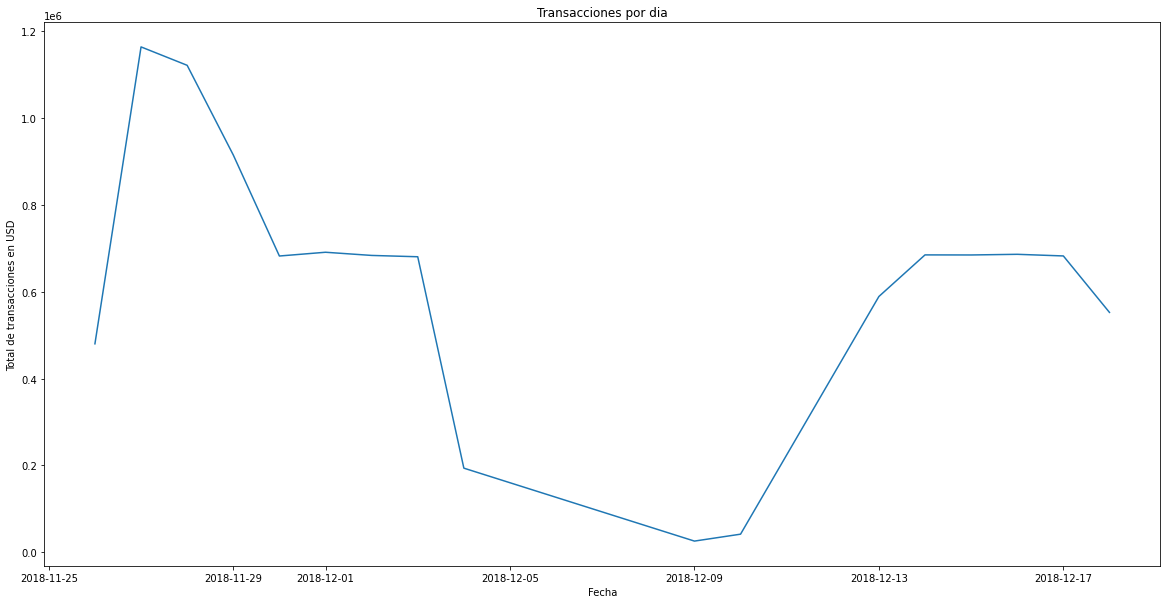

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
group.plot.line()
ax.set_title('Transacciones por dia')
ax.set_ylabel('Total de transacciones en USD')
ax.set_xlabel('Fecha')

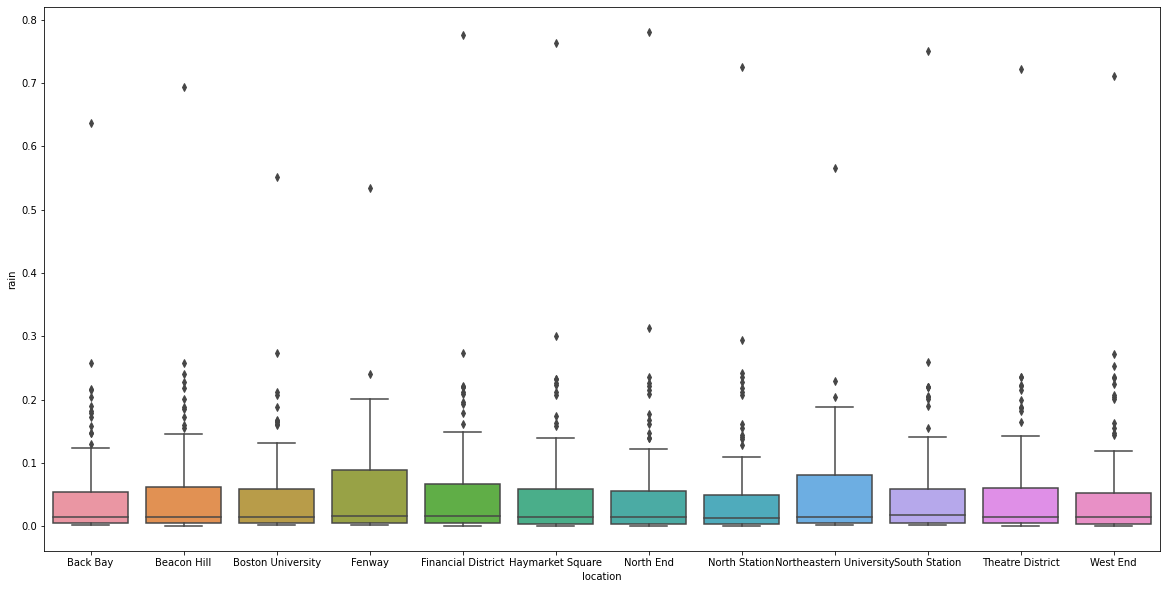

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=Uber_Lyft_Weather, x='location',y='rain')

In [35]:
agg_df1=Uber_Lyft_Cab_rides.groupby(['source'])['source'].count() 
agg_df1.head()

source
Back Bay              57792
Beacon Hill           57403
Boston University     57764
Fenway                57757
Financial District    58857
Name: source, dtype: int64

In [36]:
agg_df1=Uber_Lyft_Cab_rides.groupby(['destination'])['destination'].count() 
agg_df1.head()

destination
Back Bay              57780
Beacon Hill           57403
Boston University     57764
Fenway                57757
Financial District    58851
Name: destination, dtype: int64

### Merging datasets

In [38]:
Uber_Lyft_Cab_rides['timestamp'] = pd.to_datetime(Uber_Lyft_Cab_rides['time_stamp'], unit='ms')
Uber_Lyft_Cab_rides['date_hour'] = Uber_Lyft_Cab_rides['timestamp'].dt.strftime('%Y-%m-%d:%H.%M.%S')
Uber_Lyft_Weather['timestamp'] = pd.to_datetime(Uber_Lyft_Weather['time_stamp'], unit='s')
Uber_Lyft_Weather['date_hour'] = Uber_Lyft_Weather['timestamp'].dt.strftime('%Y-%m-%d:%H.%M.%S')

In [39]:
def merge_datasets():
    merged = pd.merge(left=Uber_Lyft_Cab_rides,
                      right=Uber_Lyft_Weather,
                      left_on=['source', 'date_hour'],
                      right_on=['location', 'date_hour'],
                      suffixes=('_ride', '_weather'))

    # drop the merge fields -- location = source
    drop_cols = ['date_hour', 'location']
    merged = merged.drop(drop_cols, axis=1)

    # if rain is missing then there is no rain... fill with 0
    merged['rain'] = merged['rain'].fillna(0)
    return merged


all_data = merge_datasets()
all_data.head()

,distance,cab_type,time_stamp_ride,destination,source,price,surge_multiplier,id,product_id,name,...,Fecha,timestamp_ride,temp,clouds,pressure,rain,time_stamp_weather,humidity,wind,timestamp_weather
0,0.55,Uber,1543426327706,South Station,Theatre District,7.0,1.0,74b72f4c-28bc-4640-a427-ec60b4b11f82,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,2018-11-28,2018-11-28 17:32:07.706,41.47,0.85,991.67,0.0,1543426327,0.63,9.93,2018-11-28 17:32:07
1,1.57,Uber,1543426327658,North End,Theatre District,18.0,1.0,e5aa2477-afb5-4b83-a69d-18ee7d2bfd1d,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,2018-11-28,2018-11-28 17:32:07.658,41.47,0.85,991.67,0.0,1543426327,0.63,9.93,2018-11-28 17:32:07
2,2.12,Lyft,1543426327658,Northeastern University,Theatre District,10.5,1.0,4d24470f-167a-4d1f-9cab-c123a0713491,lyft,Lyft,...,2018-11-28,2018-11-28 17:32:07.658,41.47,0.85,991.67,0.0,1543426327,0.63,9.93,2018-11-28 17:32:07
3,2.12,Lyft,1543426327658,Northeastern University,Theatre District,7.0,1.0,7902bfaf-5987-499b-9c04-222f4182c581,lyft_line,Shared,...,2018-11-28,2018-11-28 17:32:07.658,41.47,0.85,991.67,0.0,1543426327,0.63,9.93,2018-11-28 17:32:07
4,2.12,Lyft,1543426327658,Northeastern University,Theatre District,16.5,1.0,91129083-ed19-41fd-b16a-06c729ff0790,lyft_plus,Lyft XL,...,2018-11-28,2018-11-28 17:32:07.658,41.47,0.85,991.67,0.0,1543426327,0.63,9.93,2018-11-28 17:32:07


### Correlation Analysis

In [40]:
all_data_corr = all_data[['temp','clouds','pressure','rain','humidity','wind','distance','price','surge_multiplier']]
all_data_corr.corr()

,temp,clouds,pressure,rain,humidity,wind,distance,price,surge_multiplier
temp,1.000000,0.717741,0.491912,0.283467,0.109257,0.139188,0.002091,0.021952,0.007020
clouds,0.717741,1.000000,0.511771,0.203676,0.146822,-0.025037,0.026161,0.036422,-0.002199
pressure,0.491912,0.511771,1.000000,0.131150,0.654853,-0.527508,0.008023,0.011879,0.034264
rain,0.283467,0.203676,0.131150,1.000000,0.267148,0.260530,-0.014968,-0.014784,-0.028658
humidity,0.109257,0.146822,0.654853,0.267148,1.000000,-0.634612,0.002723,-0.006420,0.025374
wind,0.139188,-0.025037,-0.527508,0.260530,-0.634612,1.000000,-0.005161,-0.009800,-0.023441
distance,0.002091,0.026161,0.008023,-0.014968,0.002723,-0.005161,1.000000,0.352504,0.040995
price,0.021952,0.036422,0.011879,-0.014784,-0.006420,-0.009800,0.352504,1.000000,0.294362
surge_multiplier,0.007020,-0.002199,0.034264,-0.028658,0.025374,-0.023441,0.040995,0.294362,1.000000


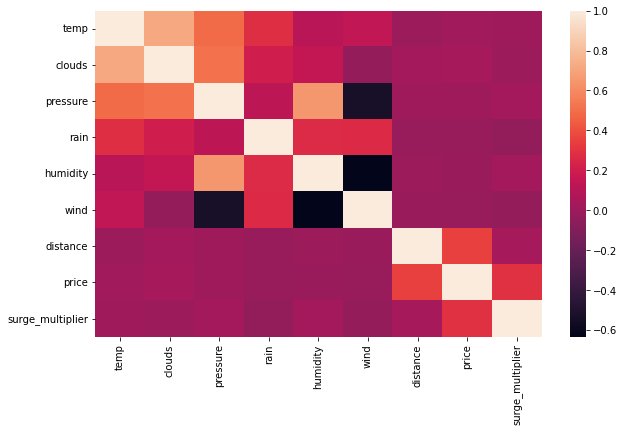

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(all_data_corr.corr(),cmap='rocket')